# Install packages

In [20]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

# Load in Data

In [3]:
avocados = pd.read_csv("avocados.csv")

# Does the total volume of avocados sold differ between Indianapolis, Orlando, and PhoenixTuscon? 

In [4]:
avocados.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# Data Wrangling
## Focusing on the Three regions

In [72]:
region = ['Indianapolis', 'Orlando', 'PhoenixTuscon']
avocados1 = avocados['region'].isin(region)
avocados2 = avocados[avocados1].copy()

## Subsetting to Only the Variables Needed

In [73]:
avocados3 = avocados2[['region','Total Volume']]

In [74]:
avocados3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 988 to 17984
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        676 non-null    object 
 1   Total Volume  676 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


## Changing Column names

In [75]:
avocados3.columns = ['region', 'TotalVolume']

In [76]:
avocados3.columns

Index(['region', 'TotalVolume'], dtype='object')

## Changing Total Volume to an Integer

In [77]:
avocados3.TotalVolume = avocados3.TotalVolume.astype(int)

C:\Users\music\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
avocados3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 988 to 17984
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   region       676 non-null    object
 1   TotalVolume  676 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 13.2+ KB


## Recoding region to a Number

In [78]:
def recode (series):
    if series == "Indianapolis": 
        return 0
    if series == "Orlando": 
        return 1
    if series == "PhoenixTucson":
        return 2

avocados3['regionR'] = avocados3['region'].apply(recode)

<ipython-input-78-1f43d330e21a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocados3['regionR'] = avocados3['region'].apply(recode)


## Dropping the Original region Variable

In [79]:
avocados4 = avocados3[['regionR','TotalVolume']]

# Test Assumptions

C:\Users\music\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalVolume', ylabel='Density'>

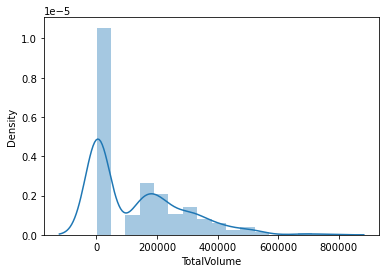

In [37]:
sns.distplot(avocados4['TotalVolume'])

C:\Users\music\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalVolumeSQRT', ylabel='Density'>

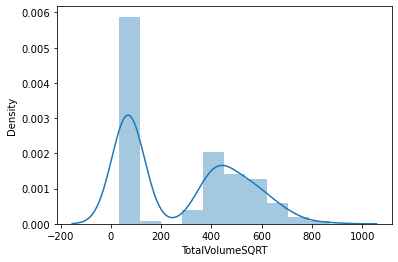

In [38]:
avocados4['TotalVolumeSQRT'] = np.sqrt(avocados4['TotalVolume'])
sns.distplot(avocados4['TotalVolumeSQRT'])

C:\Users\music\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalVolumeSQRTLOG', ylabel='Density'>

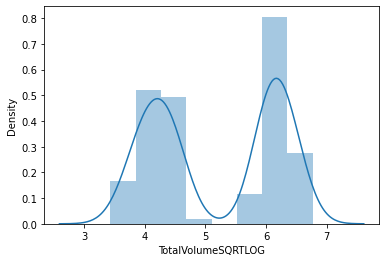

In [39]:
avocados4['TotalVolumeSQRTLOG'] = np.log(avocados4['TotalVolumeSQRT'])
sns.distplot(avocados4['TotalVolumeSQRTLOG'])

# Homogeneity of Variance

In [40]:
scipy.stats.bartlett(avocados4['TotalVolumeSQRTLOG'], avocados4['regionR'])

BartlettResult(statistic=325.4355690469976, pvalue=9.483032166808211e-73)

In [41]:
scipy.stats.fligner(avocados4['TotalVolumeSQRTLOG'], avocados4['regionR'])

FlignerResult(statistic=867.9390748042205, pvalue=9.154214657182348e-191)

# The p value associated with this test is < .05, which means that unfortunately, you have violated the assumption of homogeneity of variance.



# Which means that you can run the ANOVA, but there is a good chance it will be inaccurate. If you do choose to proceed with the analysis in Python, ensure that all parties consuming your results understand that there could be inaccuracies with the data analysis!

In [42]:
postHoc = MultiComparison(avocados4['TotalVolumeSQRTLOG'], avocados4['regionR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.2146 0.0067 0.0596 0.3696   True
--------------------------------------------------


# True difference in those groups however may be inaccurate.

In [43]:
avocados4.groupby('regionR').mean()

,TotalVolume,TotalVolumeSQRT,TotalVolumeSQRTLOG
regionR,,,
0,89536.180473,240.444255,5.078744
1,173551.840237,324.643652,5.293341
